### Performance tests
In this notebook we test the performance of the CURE, DBSCAN, hierarchical and k-means clustering models. Each will be test using 1000, 10,000 and 100,000 data points.

In [1]:
\c 20 100
\l ml/ml.q
.ml.loadfile`:clust/init.q
plt:.p.import`matplotlib.pyplot

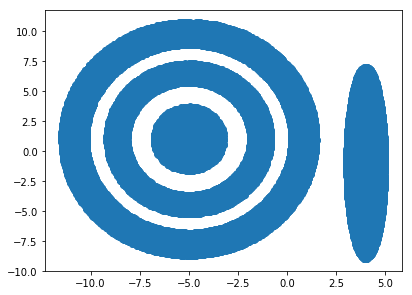

In [2]:
dsc:{[n;r;s](r+n?s-r)*/:(cos;sin)@\:4*n?acos 0}
d :flip(-5 1)+(1 1.5)*dsc[10000;0;1.8],'dsc[20000;3.1;4.2],'dsc[40000;5.2;6.5]
d,:flip(4 -1)+(1 8)*dsc[40000;0;1.]
plt[`:scatter][;]. flip d;
plt[`:show][];

In [3]:
/take samples of d with 100, 1000 and 10,000 data points
sample:{x neg[y&count x]?count x}
d1h: sample[d;100]
d5h: sample[d;500]
d1k: sample[d;1000]
d5k: sample[d;5000]
d10k:sample[d;10000]

In [4]:
/input dictionary
id:`cure`dbscan`hc`kmeans!(` sv'`.ml.clust,'`cure`dbscan`hc`kmeans),'
        (enlist each((4;30;enlist each{![`df`c`b`s;x]}each(cross/)(`e2dist;0;01b;0b));
                     (`e2dist;2;1.2);(4;`e2dist;key .ml.clust.i.ld);(4;50;0b;`e2dist))),'
        enlist each((2;`b);();enlist 2;())

/performance - returns time and space for a function
/* d = data
/* a = algo
perform:{[d;a]
 r:p[id[a;0];d]each i:(cross/)id[a;1];
 m:`$t:string a;
 if[a in`cure`hc;m:`$t,/:"_",/:string each{k:.[y;id[x;2]];$[k~1b;`C;k~0b;`q;k]}[a]each i];
 flip(`method,`$("time_";"space_"),\:string count d)!enlist[m],flip r}

/get algos
p:{.Q.ts[get[x]y;z]}

/select which columns to output
/* x = performance table
/* y = columns to select - `space`time
output:{str:string[y],"*";?[x;();0b;(`method,col)!`method,col:c where string[c:cols x]like str]}

In [5]:
t:(^/){raze perform[y]each key x}[id]each(d1h;d5h;d1k;d5k;d10k)

In [8]:
show sp:output[t;`space]

method      space_100 space_500 space_1000 space_5000 space_10000
-----------------------------------------------------------------
cure_q      39456     161968    305264     1876128    3737008    
cure_C      36400     156032    305280     1876144    3737024    
dbscan      18496     339680    2344976    487510512  4213811984 
hc_single   52592     174416    299328     1756624    3489888    
hc_complete 173904    3814912   15754144   397648496  1624978224 
hc_average  143696    4185696   17058864   401229264  1620028576 
hc_centroid 44544     151280    289328     1771216    3530768    
hc_ward     28608     109600    215504     1561568    3120592    
kmeans      22016     97792     194560     1165312    2329600    


In [9]:
show tm:output[t;`time]

method      time_100 time_500 time_1000 time_5000 time_10000
------------------------------------------------------------
cure_q      135      1170     3202      37841     109899    
cure_C      4        34       99        1785      6246      
dbscan      0        6        28        2703      21800     
hc_single   91       445      1380      39072     254270    
hc_complete 19       575      2851      130835    696938    
hc_average  17       573      3019      131506    678763    
hc_centroid 22       107      248       2769      8960      
hc_ward     11       263      1059      26079     105120    
kmeans      2        13       27        138       281       


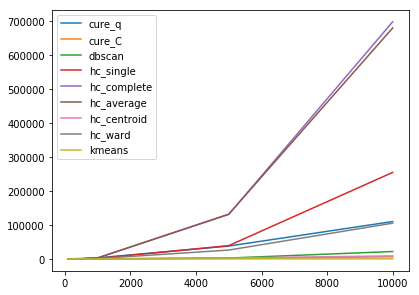

In [19]:
vals:{1_value exec from tm where method=x}each t`method
values:(100;500;1000;5000;10000)
{plt[`:plot][values;x;`label pykw y]}'[vals;t`method];
plt[`:legend][];
plt[`:show][];

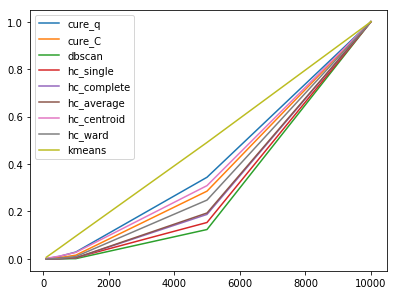

In [20]:
{plt[`:plot][values;x%max x;`label pykw y]}'[vals;t`method];
plt[`:legend][];
plt[`:show][];

---